# IRIS

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.9.12 (main, Apr  5 2022, 01:52:34) 
[Clang 12.0.0 ]
scipy: 1.9.3
numpy: 1.23.5
matplotlib: 3.5.2
pandas: 1.5.1
sklearn: 1.1.3


In [62]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_csv(url, names = names)

In [4]:
dataset.shape

(150, 5)

In [5]:
dataset.shape
dataset.head(20)
dataset.describe

<bound method NDFrame.describe of      sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [6]:
dataset.describe

<bound method NDFrame.describe of      sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [7]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

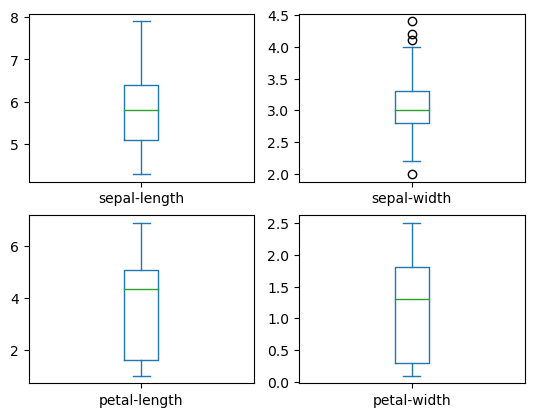

In [11]:
# box and whisker plots
dataset.plot(kind = 'box', subplots = True, layout=(2,2), sharex = False, sharey = False)
pyplot.show()

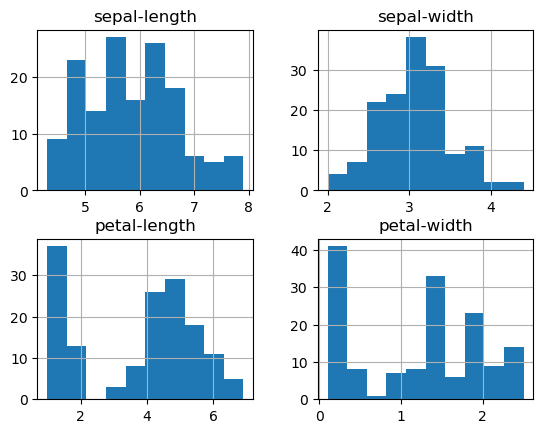

In [14]:
dataset.hist()
pyplot.show()

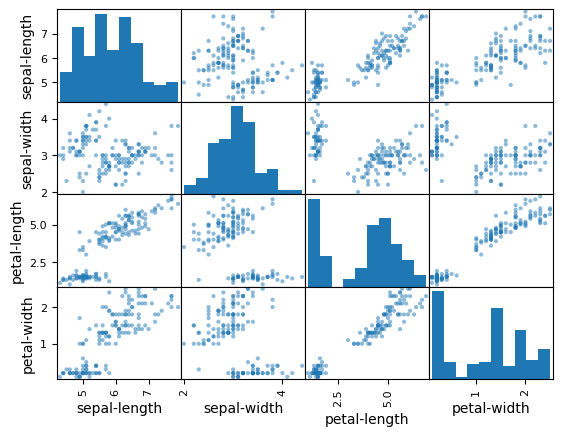

In [53]:
#scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

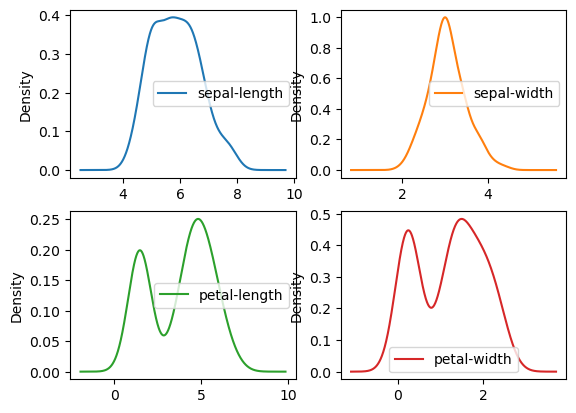

In [57]:
dataset.plot(kind = 'density', subplots = True, layout = (2,2), sharex = False)

<AxesSubplot:xlabel='class', ylabel='sepal-width'>

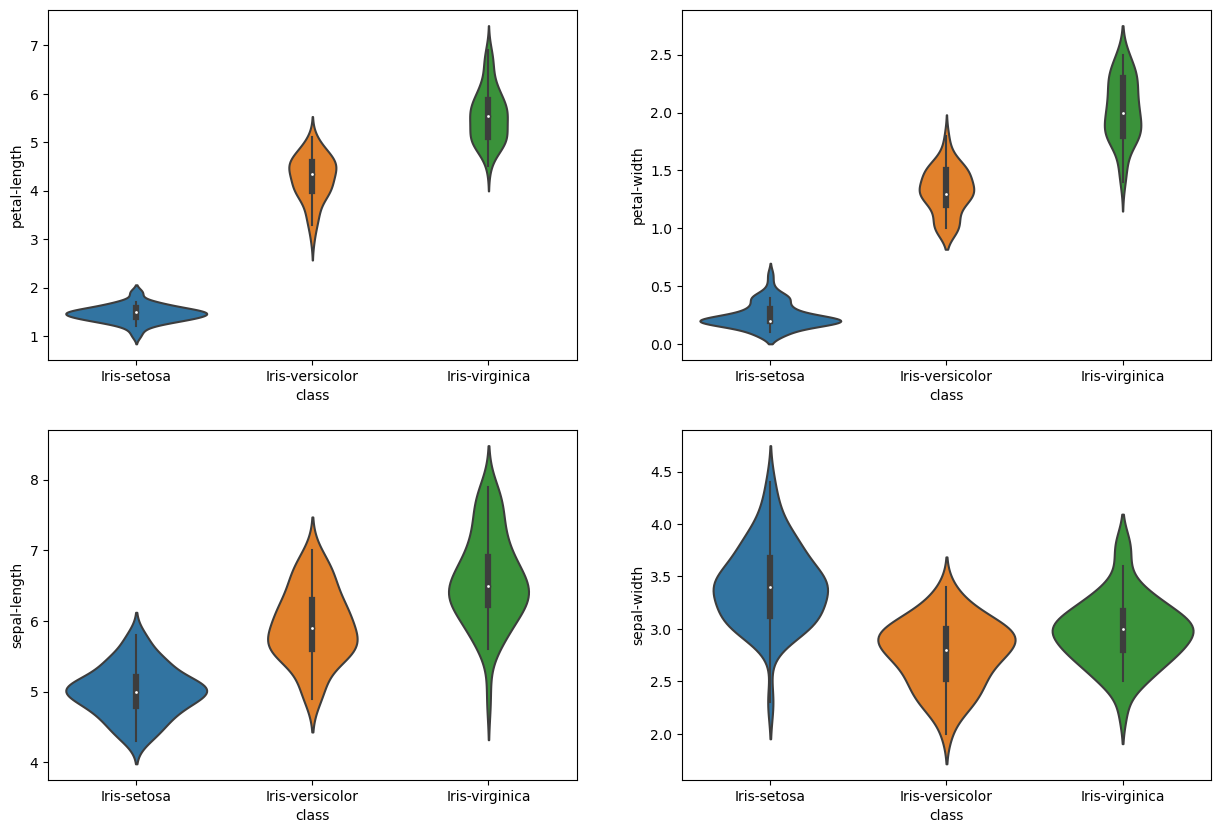

In [65]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='class',y='petal-length',data=dataset)
plt.subplot(2,2,2)
sns.violinplot(x='class',y='petal-width',data=dataset)
plt.subplot(2,2,3)
sns.violinplot(x='class',y='sepal-length',data=dataset)
plt.subplot(2,2,4)
sns.violinplot(x='class',y='sepal-width',data=dataset)

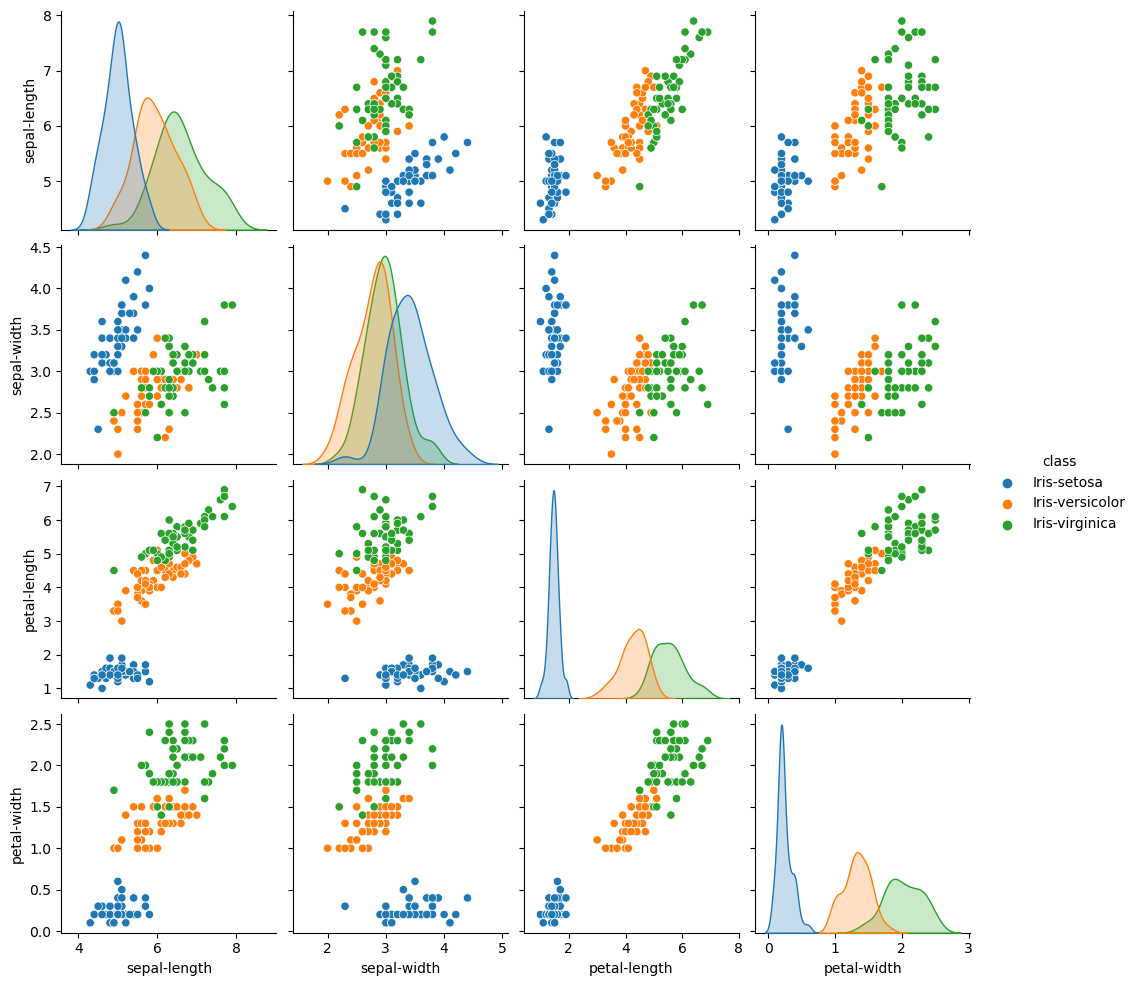

In [61]:
sns.pairplot(dataset,hue='class')

### creation of validation sets

In [26]:
array = dataset.values
X = array[:, 0:4]
y = array[:, 4]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 1)

## algs

In [32]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))

results = []
names = []
for name, model in models :
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.941667 (0.065085)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.041667)
CART: 0.950000 (0.040825)
NB: 0.950000 (0.055277)
SVM: 0.983333 (0.033333)


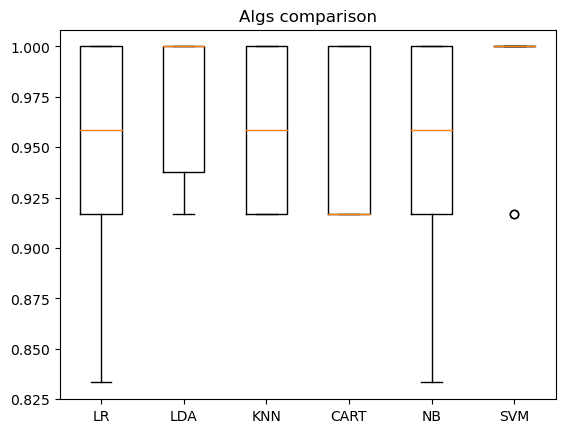

In [34]:
pyplot.boxplot(results, labels = names)
pyplot.title('Algs comparison')
pyplot.show()

In [51]:
model = SVC(gamma = 'auto')
model.fit(X_train, y_train)
predictions = model.predict(X_val)

accuracy_score(y_val, predictions)

0.9666666666666667

In [40]:
confusion_matrix(y_val, predictions)

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [52]:
print(classification_report(y_val, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

